In [60]:
#Import Keras and MNIST, as well as packages necessary for deep learning.

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [52]:
#Keras comes preloaded with a MNIST dataset containing 60k training and 10k test images of handwriting samples.

(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [53]:
#Data manipulation. The images are reshaped from their individual 784 images into a tensor, where the values are 
#converted into floats. Finally the values in the tensor are divided by 255 so that all of the images are normalized
#into 0 - 1 range.

train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [54]:
#Reformatting the categories from the dataset into "one-hot" format: each singular category is transformed into a binary array
#ranging from 0 - 9 so Keras can assign the image data accordingly. 

train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


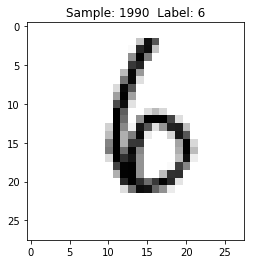

In [55]:
#a function for plotting a singular number as one-hot array from the above manipulation. create the label as a number on the
#X-axis, create an image from the chosen number reshaped into a normal image size, create the title of the number and its label, 
#and finally plot it all as grey scale. 

import matplotlib.pyplot as plt

def sample_num(num):
    print(train_labels[num])  
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
sample_num(1990)

In [56]:
#Creating the model! The Sequential model dictates it will be a linear layering of the nodes. The first layer takes the total
#number of images (784) and passes them to the next hidden layer of nodes (totalling 532) with the RELU activation method. The
#images then pass into the output layer of 10 nodes activated by Softmax. The second layer node amount was chosen because it is
#two-thirds the input node amount, plus the output node amount. The output node amount is 10 because of the original 10 
#categories in the data (handwriting samples of numbers ranging 0 - 9).

model = Sequential()
model.add(Dense(532, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [61]:
#Compiling the model. Assigning the Categorical Crossentropy loss function, the Stochiastic Gradient Descent optimization method
#and telling the model to judge the acuracy of its predictions.

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [66]:
#Fitting the model to training images and labels. The model selects 1000 random images from 10 epochs (chosen for the 10 original
#categories) and validates its predictions on the testing images and labels.

history = model.fit(train_images, train_labels,
                    batch_size=1000,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 1s - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0683 - val_accuracy: 0.9824
Epoch 2/10
60000/60000 - 1s - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0683 - val_accuracy: 0.9824
Epoch 3/10
60000/60000 - 1s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0683 - val_accuracy: 0.9824
Epoch 4/10
60000/60000 - 1s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0683 - val_accuracy: 0.9824
Epoch 5/10
60000/60000 - 1s - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0683 - val_accuracy: 0.9824
Epoch 6/10
60000/60000 - 1s - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0683 - val_accuracy: 0.9824
Epoch 7/10
60000/60000 - 1s - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0683 - val_accuracy: 0.9824
Epoch 8/10
60000/60000 - 1s - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0682 - val_accuracy: 0.9824
Epoch 9/10
60000/60000 - 1s - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0682 - val_accuracy: 0.9824
Epoch 10/10
60

In [67]:
#Using Sckit to evaluate the model on test data
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test Data loss:', score[0])
print('Test Data accuracy:', score[1])

Test Data loss: 0.06822894018442767
Test Data accuracy: 0.9824


In [ ]:
#Displaying some of the numbers the model predicted incorrectly.

for x in range(10):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()